<a href="https://colab.research.google.com/github/ahmedeElsharkawy/sample/blob/master/cluster_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
data=pd.read_csv('https://dim-mlp-images.s3.amazonaws.com/Assignment+Dataset/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# z_score=stats.zscore(data['Annual Income'])
# abs_z_score=np.abs(z_score)
# filter_outlier=(abs_z_score<3).all(axis=1)
# data=data[filter_outlier]

In [ ]:
data.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data['Annual Income'].quantile(0.75)

78.0

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler ()

In [ ]:
data2=pd.get_dummies(data,columns=['Gender'],drop_first=True, prefix=['gn'])

In [ ]:
scaled=scaler.fit_transform(data2.values)

In [ ]:
scaled_df=pd.DataFrame(scaled,index=data2.index,columns=data2.columns)

In [ ]:
scaled_df

,CustomerID,Age,Annual Income,Spending Score,gn_Male
0,-1.723412,-1.424569,-1.738999,-0.434801,1.128152
1,-1.706091,-1.281035,-1.738999,1.195704,1.128152
2,-1.688771,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.671450,-1.137502,-1.700830,1.040418,-0.886405
4,-1.654129,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061,-0.886405
196,1.671450,0.441365,2.497807,-0.861839,-0.886405
197,1.688771,-0.491602,2.497807,0.923953,1.128152
198,1.706091,-0.491602,2.917671,-1.250054,1.128152


 Apply kmeans clustering on the dataset using only Annual Income and Spending Score variables with random state = 100. Draw elbow curve for 10 clusters (1 to 10). Find the optimum number of clusters that can be selected for the dataset.

Note: Carry out standard scaling of the features before applying kmeans algorithm.

3

In [ ]:
km=KMeans(random_state=100)
#create elbow curve


In [ ]:
cluster_arr_no=[]
k_range=range(1,10)
#https://predictivehacks.com/k-means-elbow-method-code-for-python/

In [ ]:
# ‘Annual Income’ and ‘Spending Score
for i in k_range:
 k_model=KMeans(n_clusters=i)
 k_model.fit(scaled_df[['Annual Income','Spending Score']])
 cluster_arr_no.append(k_model.inertia_)

In [ ]:
cluster_arr_no

[400.0,
 269.6910121927639,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270385994,
 44.91118554999014,
 37.18292537017848,
 32.48322255742699]

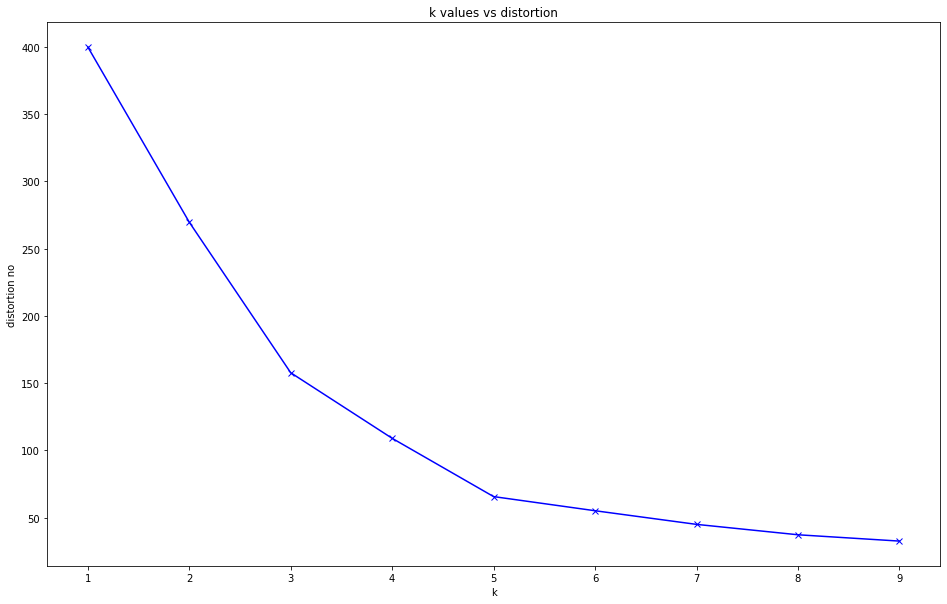

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(k_range,cluster_arr_no,'bx-')
plt.xlabel('k')
plt.ylabel('distortion no')
plt.title('k values vs distortion')
plt.show()

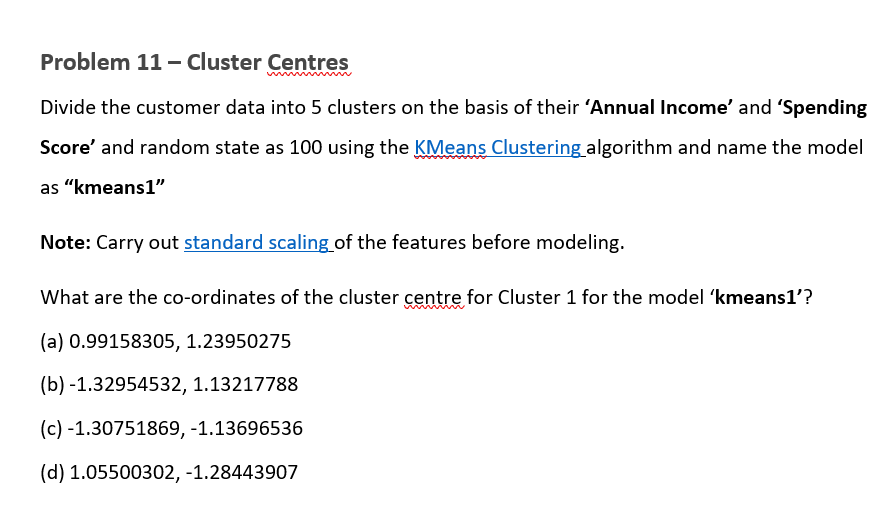

In [ ]:
#hii
kmeans1=KMeans(n_clusters=5,random_state=100)
kmeans1.fit(scaled_df[['Annual Income','Spending Score']])
kmeans1.cluster_centers_
#option a

array([[-0.20091257, -0.02645617],
       [-1.32954532,  1.13217788],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

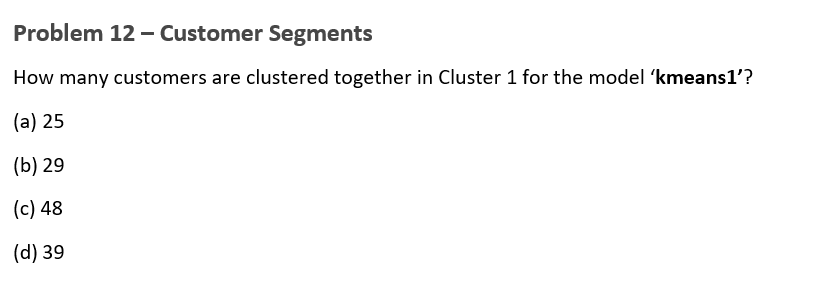

In [ ]:
#find number of points inside cluster
np.unique(kmeans1.labels_,return_counts=True)
#option d

(array([0, 1, 2, 3, 4], dtype=int32), array([81, 22, 39, 35, 23]))

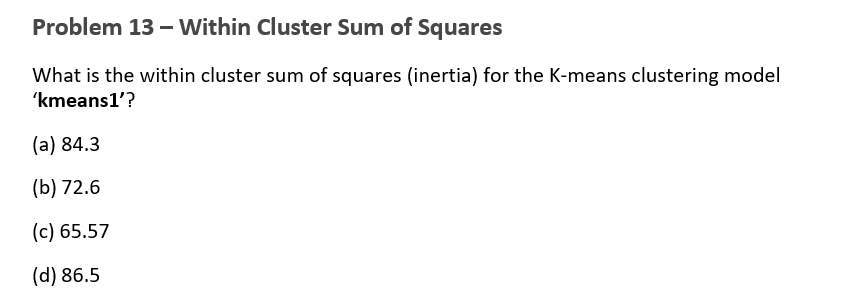

In [ ]:
kmeans1.inertia_
#option c

65.56840815571681

In [ ]:
kmeans2=KMeans(n_clusters=4,random_state=100)
kmeans2.fit(scaled_df[['Age','Annual Income','Spending Score']])
cluster_map=pd.DataFrame()
choosen_data=scaled_df[['Age','Annual Income','Spending Score']]
cluster_map['data index']=choosen_data.index.values
#https://stackoverflow.com/questions/36195457/how-to-get-the-samples-in-each-cluster

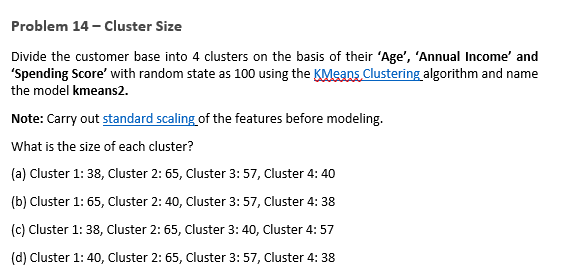

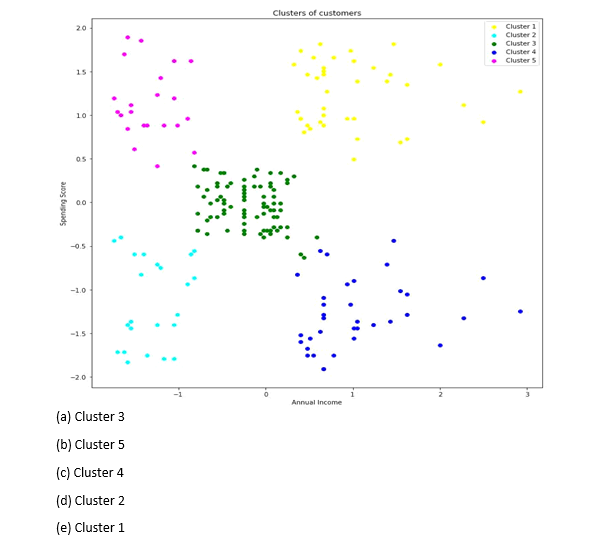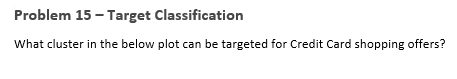

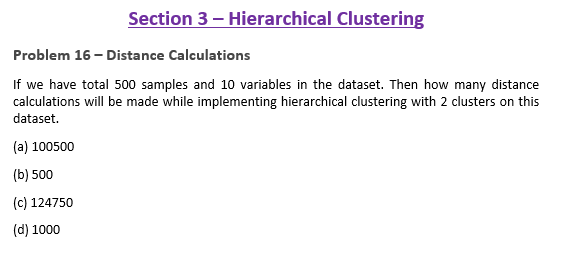

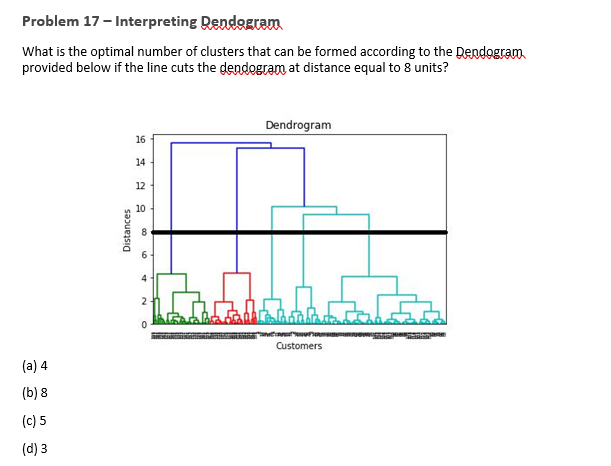

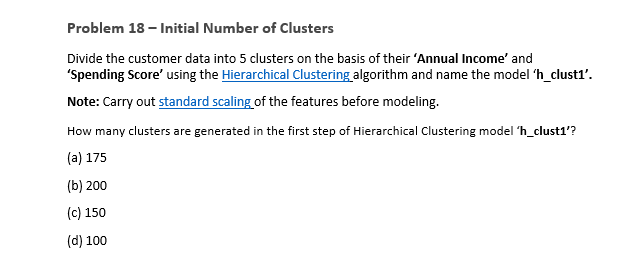

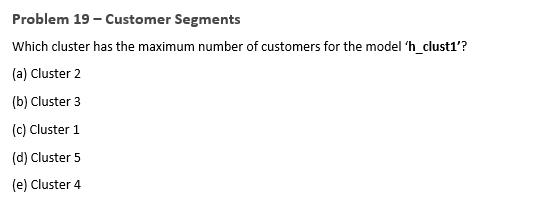

![2021-05-17 09_39_58-Assignment 4 Clustering Mall Dataset [Compatibility Mode] - Word.png](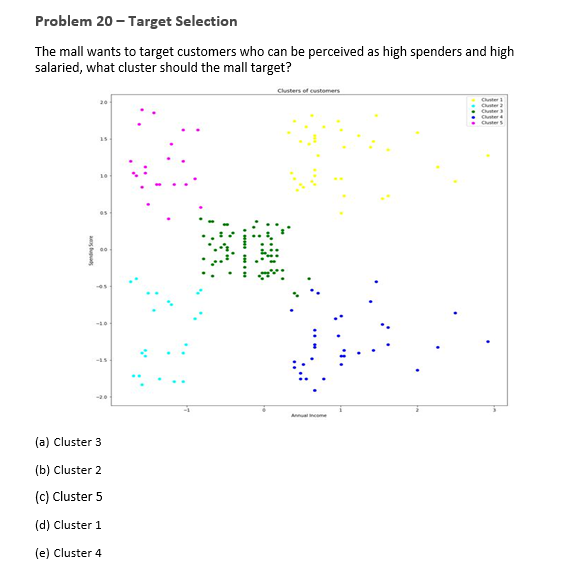)

In [ ]:
print('hiiii \n')

hiiii 

